Ahmet Kağan Bildirici 19050551004 Data augmentation and Transfer learning lab 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL #image library in python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

The flower_photos dataset consists of 3670 colour images in 5 classes.

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data.
# untar true will unzip it

*cache_dir indicates where to download data.
*untar true will unzip it

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


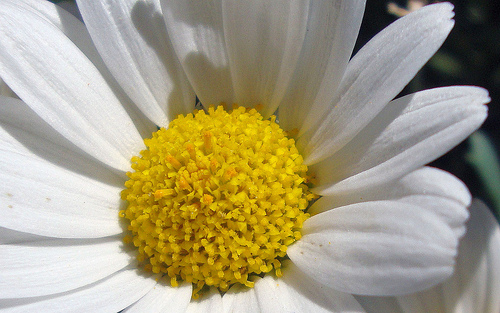

In [6]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[1]))

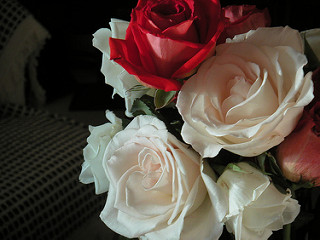

In [7]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

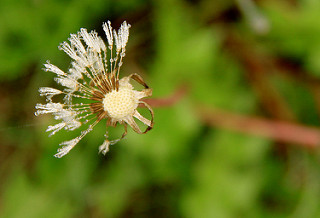

In [8]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[1]))

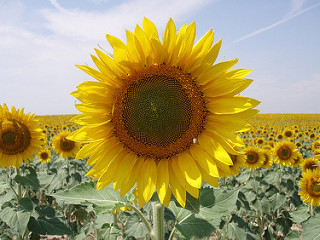

In [9]:
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[1]))

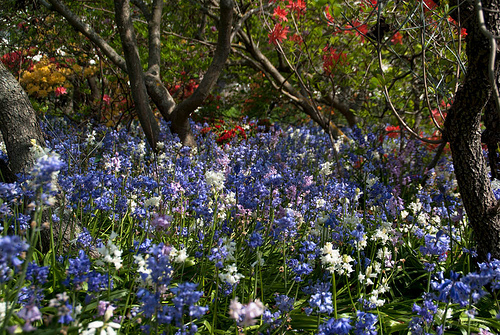

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

# Read flowers image from folder

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [14]:
X = np.array(X)
y = np.array(y)

#  Train test split and Scale images

Note that the dataset is already split into a training set. Additionally, we must scale the input features. For that we dividing them by 255 which it convert them to floats as well:

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# CNN MODEL

In [17]:
class_number = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(class_number)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=20)   

Epoch 1/20
86/86 [==============================] - 50s 577ms/step - loss: 1.3787 - accuracy: 0.4281
Epoch 2/20
86/86 [==============================] - 49s 569ms/step - loss: 1.0179 - accuracy: 0.6032
Epoch 3/20
86/86 [==============================] - 48s 558ms/step - loss: 0.8360 - accuracy: 0.6890
Epoch 4/20
86/86 [==============================] - 47s 548ms/step - loss: 0.5924 - accuracy: 0.7940
Epoch 5/20
86/86 [==============================] - 48s 556ms/step - loss: 0.3822 - accuracy: 0.8619
Epoch 6/20
86/86 [==============================] - 48s 556ms/step - loss: 0.2121 - accuracy: 0.9339
Epoch 7/20
86/86 [==============================] - 47s 545ms/step - loss: 0.1296 - accuracy: 0.9615
Epoch 8/20
86/86 [==============================] - 45s 523ms/step - loss: 0.0619 - accuracy: 0.9858
Epoch 9/20
86/86 [==============================] - 43s 505ms/step - loss: 0.0598 - accuracy: 0.9858
Epoch 10/20
86/86 [==============================] - 44s 507ms/step - loss: 0.0726 - accura

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (32, 224, 224, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 112, 112, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 112, 112, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 56, 56, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 56, 56, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (32, 28, 28, 64)         0

In [19]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 121ms/step - loss: 2.8159 - accuracy: 0.6296


[2.815941333770752, 0.6296296119689941]

<b>We can see that while train accuracy is 99% (very high), the test accuracy is significantly low (62.96%) indicating overfitting.<b>

# Improve Accuracy Using Data Augmentation

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.4),
    layers.experimental.preprocessing.RandomZoom(0.4),
  ]
)

<b>Orginal image <b>

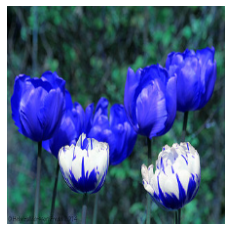

In [21]:
plt.axis('off')
plt.imshow(X[50])

<b>Using data augmentation<b>

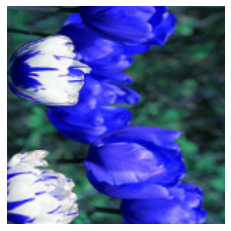

In [22]:
plt.axis('off')
plt.imshow(data_augmentation(X)[50].numpy().astype("uint8"))

<b>Orginal image <b>

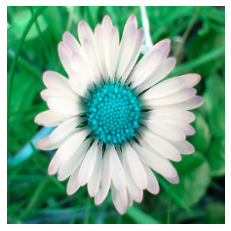

In [23]:
plt.axis('off')
plt.imshow(X[1020])

<b>Using data augmentation<b>

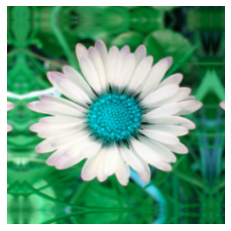

In [24]:
plt.axis('off')
plt.imshow(data_augmentation(X)[1020].numpy().astype("uint8"))

# Train the model using data augmentation

In [25]:
class_number = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(class_number)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=20)    

Epoch 1/20
86/86 [==============================] - 55s 627ms/step - loss: 1.3701 - accuracy: 0.4033
Epoch 2/20
86/86 [==============================] - 51s 590ms/step - loss: 1.0881 - accuracy: 0.5549
Epoch 3/20
86/86 [==============================] - 50s 586ms/step - loss: 1.0139 - accuracy: 0.6014
Epoch 4/20
86/86 [==============================] - 50s 587ms/step - loss: 0.9639 - accuracy: 0.6145
Epoch 5/20
86/86 [==============================] - 50s 586ms/step - loss: 0.9101 - accuracy: 0.6461
Epoch 6/20
86/86 [==============================] - 52s 610ms/step - loss: 0.8837 - accuracy: 0.6519
Epoch 7/20
86/86 [==============================] - 51s 590ms/step - loss: 0.8394 - accuracy: 0.6719
Epoch 8/20
86/86 [==============================] - 51s 589ms/step - loss: 0.8245 - accuracy: 0.6733
Epoch 9/20
86/86 [==============================] - 51s 589ms/step - loss: 0.7906 - accuracy: 0.6980
Epoch 10/20
86/86 [==============================] - 51s 587ms/step - loss: 0.7953 - accura

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)       

In [27]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 116ms/step - loss: 0.7730 - accuracy: 0.6874


[0.7729648947715759, 0.687363862991333]

<b>We can see that by using data augmentation the accuracy of test set predictions is increased to 68.73% and we got rid of overfitting <b>

# Transfer Learning

In [32]:
import tensorflow_hub as hub

feature_extractor_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
feature_extractor_layer = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

# Before Transfer Learning (training)

In [34]:
from tensorflow.keras.layers.experimental.preprocessing import Resizing
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, AvgPool2D
TL_model = tf.keras.Sequential([
  Resizing(224, 224),  
  feature_extractor_layer,
  Dense(5, 'softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_4 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [35]:
TL_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

In [36]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 12s 403ms/step - loss: 1.8522 - acc: 0.1917


[1.852236032485962, 0.1917211264371872]

<b>Before training pre-trained model the test accuracy significant low <b> (19.1%).

# Lets Do Transfer Learning (training)

In [37]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 38s 414ms/step - loss: 0.8144 - acc: 0.6999
Epoch 2/5
86/86 [==============================] - 36s 420ms/step - loss: 0.4194 - acc: 0.8597
Epoch 3/5
86/86 [==============================] - 36s 419ms/step - loss: 0.3262 - acc: 0.8921
Epoch 4/5
86/86 [==============================] - 37s 430ms/step - loss: 0.2687 - acc: 0.9113
Epoch 5/5
86/86 [==============================] - 36s 422ms/step - loss: 0.2359 - acc: 0.9226


In [38]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 12s 417ms/step - loss: 0.3910 - acc: 0.8606


[0.3910011053085327, 0.8605664372444153]

<b>As a result, when we create our own CNN model without using a pre-train model, the success is low even if the epoch numbers are high (for example, in our model, the success is 64% in the 5th epoch, while it is 95% in the pre-trained model 5th epoch). Additionally, Test accuracy increased from 68.74% to 86.05%. As you can see pre-trained models are better in terms of time cost and accuracy.<b>
